
Project Name-PRCP-1023-COVID-19 PREDICTION

Team Members:

1.Ashish Ray Mohapatra

2.Ancil Xavier

3.Ramchandra Rao
    

 # Business Case : EDA OF COVID-19 RECOVERY CASES

### Load Libraries

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as datetme
import warnings
warnings.filterwarnings('ignore')

### Load data

In [2]:
df = pd.read_csv('./time_series_covid19_recovered_global.csv', )

In [3]:
df.shape[0]

253

In [4]:
df['Province/State'].isnull().sum()

186

In [5]:
253-186 ## only 67 rows has province/state rest of them are NaN , hence delete this column is of no use

67

In [6]:
df.drop(columns=['Province/State', 'Lat', 'Long'], axis=1, inplace=True)

In [7]:
df

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,9/12/20,9/13/20,9/14/20,9/15/20,9/16/20,9/17/20,9/18/20,9/19/20,9/20/20,9/21/20
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,31234,31638,32073,32098,32503,32505,32576,32576,32576,32576
1,Albania,0,0,0,0,0,0,0,0,0,...,6494,6569,6615,6668,6733,6788,6831,6888,6940,6995
2,Algeria,0,0,0,0,0,0,0,0,0,...,33875,34037,34204,34385,34517,34675,34818,34923,35047,35180
3,Andorra,0,0,0,0,0,0,0,0,0,...,943,943,945,945,1054,1054,1164,1164,1164,1199
4,Angola,0,0,0,0,0,0,0,0,0,...,1289,1301,1324,1332,1401,1405,1443,1445,1445,1449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
248,West Bank and Gaza,0,0,0,0,0,0,0,0,0,...,19979,20082,21406,21804,22209,23060,23333,23446,23700,24428
249,Western Sahara,0,0,0,0,0,0,0,0,0,...,8,8,8,8,8,8,8,8,8,8
250,Yemen,0,0,0,0,0,0,0,0,0,...,1211,1212,1215,1219,1221,1221,1221,1221,1227,1235
251,Zambia,0,0,0,0,0,0,0,0,0,...,12007,12260,12380,12590,12869,13029,13207,13365,13365,13629


In [8]:
df['Country/Region'].isnull().sum()

0

### Transpose data

In [9]:
df = df.melt(id_vars="Country/Region", 
        var_name="Date", 
        value_name="Cases")

In [10]:
df.head()

,Country/Region,Date,Cases
0,Afghanistan,1/22/20,0
1,Albania,1/22/20,0
2,Algeria,1/22/20,0
3,Andorra,1/22/20,0
4,Angola,1/22/20,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61732 entries, 0 to 61731
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Country/Region  61732 non-null  object
 1   Date            61732 non-null  object
 2   Cases           61732 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [12]:
df.shape

(61732, 3)

In [13]:
df.Cases.unique()

array([    0,    28,     2, ..., 48369, 56726, 24428], dtype=int64)

In [14]:
# check for countries having 0 cases and we may want to get rid off them
df.loc[df['Cases']==0].count()

Country/Region    14338
Date              14338
Cases             14338
dtype: int64

In [15]:
df1 = df.loc[(df['Cases']>0)]

In [16]:
df1.loc[df1['Cases']==0].count()

Country/Region    0
Date              0
Cases             0
dtype: int64

In [17]:
df1.shape

(47394, 3)

In [18]:
61732-14338

47394

In [19]:
df1

,Country/Region,Date,Cases
56,China,1/22/20,28
301,China,1/23/20,2
309,China,1/23/20,28
550,China,1/24/20,1
554,China,1/24/20,2
...,...,...,...
61727,West Bank and Gaza,9/21/20,24428
61728,Western Sahara,9/21/20,8
61729,Yemen,9/21/20,1235
61730,Zambia,9/21/20,13629


In [20]:
df1['Date']=pd.to_datetime(df1['Date'])

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47394 entries, 56 to 61731
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  47394 non-null  object        
 1   Date            47394 non-null  datetime64[ns]
 2   Cases           47394 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.4+ MB


### Prepare the data

In [22]:
# sort the dataframe df1 by country/region , date
df1.sort_values(by = ['Country/Region', 'Date'], axis=0, ascending=[True, True], inplace=True,
               kind='quicksort', na_position='first', ignore_index=True, key=None)

In [23]:
df1['CasesPerD'] = df1.groupby('Country/Region')['Cases'].diff()

In [24]:
df1

,Country/Region,Date,Cases,CasesPerD
0,Afghanistan,2020-03-16,1,NaN
1,Afghanistan,2020-03-17,1,0.0
2,Afghanistan,2020-03-18,1,0.0
3,Afghanistan,2020-03-19,1,0.0
4,Afghanistan,2020-03-20,1,0.0
...,...,...,...,...
47389,Zimbabwe,2020-09-17,5841,18.0
47390,Zimbabwe,2020-09-18,5883,42.0
47391,Zimbabwe,2020-09-19,5914,31.0
47392,Zimbabwe,2020-09-20,5924,10.0


In [25]:
df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='Afghanistan') & (df1['CasesPerD'].isnull())]

,Country/Region,Date,Cases,CasesPerD
0,Afghanistan,2020-03-16,1,NaN


In [26]:
df2=df1

In [27]:
df1['CasesPerD'] = np.where(df1['CasesPerD'].isnull(), df1['Cases'], df1['CasesPerD'])

In [28]:
df1['yyyymm']=df1['Date'].dt.year.astype(str) + "-" + df1['Date'].dt.month.astype(str)

In [29]:
df1.yyyymm.unique()

array(['2020-3', '2020-4', '2020-5', '2020-6', '2020-7', '2020-8',
       '2020-9', '2020-1', '2020-2'], dtype=object)

In [30]:
df1.loc[df1['yyyymm']=='2020-9'] ##.sum()

,Country/Region,Date,Cases,CasesPerD,yyyymm
169,Afghanistan,2020-09-01,29231,142.0,2020-9
170,Afghanistan,2020-09-02,29315,84.0,2020-9
171,Afghanistan,2020-09-03,29390,75.0,2020-9
172,Afghanistan,2020-09-04,29713,323.0,2020-9
173,Afghanistan,2020-09-05,30082,369.0,2020-9
...,...,...,...,...,...
47389,Zimbabwe,2020-09-17,5841,18.0,2020-9
47390,Zimbabwe,2020-09-18,5883,42.0,2020-9
47391,Zimbabwe,2020-09-19,5914,31.0,2020-9
47392,Zimbabwe,2020-09-20,5924,10.0,2020-9


In [31]:
df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='Algeria') & (df1['yyyymm']=='2020-3')]

,Country/Region,Date,Cases,CasesPerD,yyyymm
375,Algeria,2020-03-12,8,8.0,2020-3
376,Algeria,2020-03-13,8,0.0,2020-3
377,Algeria,2020-03-14,12,4.0,2020-3
378,Algeria,2020-03-15,12,0.0,2020-3
379,Algeria,2020-03-16,12,0.0,2020-3
380,Algeria,2020-03-17,12,0.0,2020-3
381,Algeria,2020-03-18,12,0.0,2020-3
382,Algeria,2020-03-19,32,20.0,2020-3
383,Algeria,2020-03-20,32,0.0,2020-3
384,Algeria,2020-03-21,32,0.0,2020-3


In [32]:
df1.loc[(df1['CasesPerD']<0)]

,Country/Region,Date,Cases,CasesPerD,yyyymm
387,Algeria,2020-03-24,24,-41.0,2020-3
389,Algeria,2020-03-26,29,-36.0,2020-3
449,Algeria,2020-05-25,4747,-37.0,2020-5
912,Angola,2020-08-28,1028,-307.0,2020-8
1502,Australia,2020-02-17,2,-2.0,2020-2
...,...,...,...,...,...
46428,Vietnam,2020-04-30,219,-3.0,2020-4
46532,Vietnam,2020-08-12,409,-42.0,2020-8
46590,West Bank and Gaza,2020-04-06,24,-1.0,2020-4
46612,West Bank and Gaza,2020-04-28,71,-12.0,2020-4


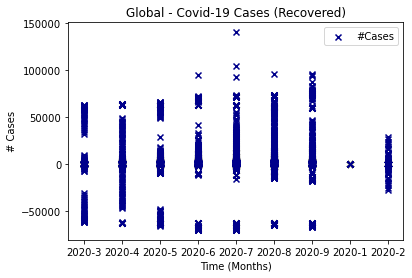

In [33]:
plt.title("Global - Covid-19 Cases (Recovered)")
plt.scatter(df1['yyyymm'], df1['CasesPerD'], color='darkblue', marker='x', label="#Cases")
plt.xlabel("Time (Months)")
plt.ylabel("# Cases")
#plt.grid(True)
plt.legend()
plt.show()

In [34]:
df1_smry=df1.groupby('yyyymm').sum()

In [35]:
df1_smry

,Cases,CasesPerD
yyyymm,,
2020-1,844,22.0
2020-2,380794,1449.0
2020-3,2705380,100882.0
2020-4,16307188,826392.0
2020-5,54096711,1620430.0
2020-6,118883273,2712765.0
2020-7,242157800,5022064.0
2020-8,423463853,6430030.0
2020-9,403789730,4567027.0


In [36]:
df1_smry['CasesPerD']

yyyymm
2020-1         22.0
2020-2       1449.0
2020-3     100882.0
2020-4     826392.0
2020-5    1620430.0
2020-6    2712765.0
2020-7    5022064.0
2020-8    6430030.0
2020-9    4567027.0
Name: CasesPerD, dtype: float64

In [37]:
df1['CasesPerD'].sum()

21281061.0

In [38]:
df1[['CasesPerD','yyyymm' ]]

,CasesPerD,yyyymm
0,1.0,2020-3
1,0.0,2020-3
2,0.0,2020-3
3,0.0,2020-3
4,0.0,2020-3
...,...,...
47389,18.0,2020-9
47390,42.0,2020-9
47391,31.0,2020-9
47392,10.0,2020-9


In [39]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47394 entries, 0 to 47393
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  47394 non-null  object        
 1   Date            47394 non-null  datetime64[ns]
 2   Cases           47394 non-null  int64         
 3   CasesPerD       47394 non-null  float64       
 4   yyyymm          47394 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 1.8+ MB


In [40]:
df1

,Country/Region,Date,Cases,CasesPerD,yyyymm
0,Afghanistan,2020-03-16,1,1.0,2020-3
1,Afghanistan,2020-03-17,1,0.0,2020-3
2,Afghanistan,2020-03-18,1,0.0,2020-3
3,Afghanistan,2020-03-19,1,0.0,2020-3
4,Afghanistan,2020-03-20,1,0.0,2020-3
...,...,...,...,...,...
47389,Zimbabwe,2020-09-17,5841,18.0,2020-9
47390,Zimbabwe,2020-09-18,5883,42.0,2020-9
47391,Zimbabwe,2020-09-19,5914,31.0,2020-9
47392,Zimbabwe,2020-09-20,5924,10.0,2020-9


In [41]:
df1.CasesPerD=df1.CasesPerD.astype(np.int64)

In [42]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47394 entries, 0 to 47393
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Country/Region  47394 non-null  object        
 1   Date            47394 non-null  datetime64[ns]
 2   Cases           47394 non-null  int64         
 3   CasesPerD       47394 non-null  int64         
 4   yyyymm          47394 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 1.8+ MB


### Global Recovery Cases Analysis

In [43]:
df1

,Country/Region,Date,Cases,CasesPerD,yyyymm
0,Afghanistan,2020-03-16,1,1,2020-3
1,Afghanistan,2020-03-17,1,0,2020-3
2,Afghanistan,2020-03-18,1,0,2020-3
3,Afghanistan,2020-03-19,1,0,2020-3
4,Afghanistan,2020-03-20,1,0,2020-3
...,...,...,...,...,...
47389,Zimbabwe,2020-09-17,5841,18,2020-9
47390,Zimbabwe,2020-09-18,5883,42,2020-9
47391,Zimbabwe,2020-09-19,5914,31,2020-9
47392,Zimbabwe,2020-09-20,5924,10,2020-9


In [44]:
df1.groupby(['Country/Region','yyyymm']).sum()/df1.CasesPerD.sum()*100

Cases  CasesPerD
Country/Region yyyymm                     
Afghanistan    2020-3  0.000122   0.000023
               2020-4  0.013754   0.001198
               2020-5  0.113383   0.005019
               2020-6  0.868227   0.060161
               2020-7  3.233471   0.053465
...                         ...        ...
Zimbabwe       2020-5  0.002209   0.000113
               2020-6  0.009929   0.000625
               2020-7  0.061092   0.003957
               2020-8  0.446712   0.019816
               2020-9  0.553041   0.003303

[1276 rows x 2 columns]

In [45]:
df2 = df1.groupby(['yyyymm']).sum()

In [46]:
df2.drop(columns='Cases', axis=0, inplace=True)

In [47]:
df2['Perc']= df2['CasesPerD']/df2['CasesPerD'].sum()*100

In [48]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 2020-1 to 2020-9
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   CasesPerD  9 non-null      int64  
 1   Perc       9 non-null      float64
dtypes: float64(1), int64(1)
memory usage: 216.0+ bytes


In [49]:
df2['month']=df2.index

In [50]:
df2

,CasesPerD,Perc,month
yyyymm,,,
2020-1,22,0.000103,2020-1
2020-2,1449,0.006809,2020-2
2020-3,100882,0.474046,2020-3
2020-4,826392,3.883227,2020-4
2020-5,1620430,7.614423,2020-5
2020-6,2712765,12.747320,2020-6
2020-7,5022064,23.598748,2020-7
2020-8,6430030,30.214800,2020-8
2020-9,4567027,21.460523,2020-9


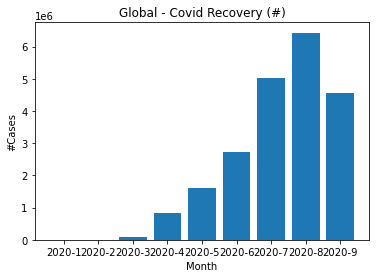

In [51]:
plt.bar(df2.month,df2.CasesPerD)
plt.title('Global - Covid Recovery (#)')
plt.xlabel('Month')
plt.ylabel('#Cases')
plt.show()

In [52]:
df2.Perc.max(), df2.Perc.min()

(30.214799910587164, 0.00010337830430541034)

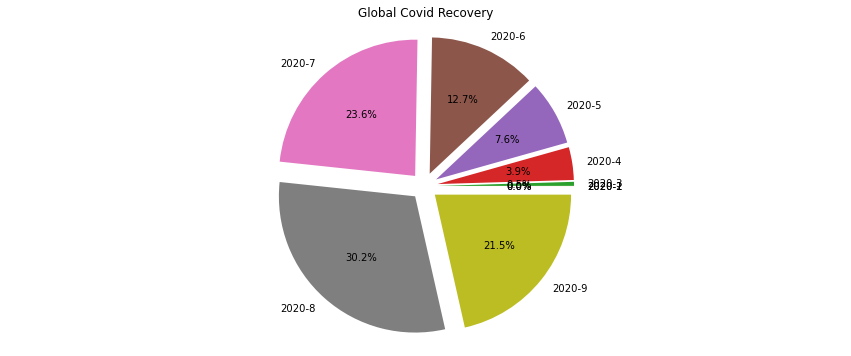

In [53]:
plt.figure(figsize=(15,6))
plt.pie(df2['CasesPerD'], labels = df2['month'],autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.title('Global Covid Recovery')
plt.axis('equal')
plt.show()

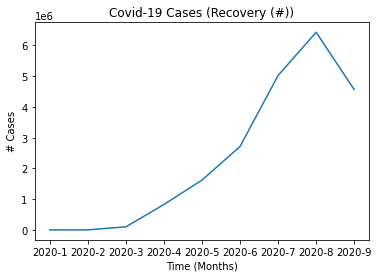

In [54]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("Covid-19 Cases (Recovery (#))")  
plt.plot(df2['month'], df2['CasesPerD'])
plt.show() 

In [55]:
df2['PercMoves'] = df2['Perc'].diff()

In [56]:
df2['PercMoves'] = np.where(df2['PercMoves'].isnull(), df2['Perc'], df2['PercMoves'])

In [57]:
df2

,CasesPerD,Perc,month,PercMoves
yyyymm,,,,
2020-1,22,0.000103,2020-1,0.000103
2020-2,1449,0.006809,2020-2,0.006705
2020-3,100882,0.474046,2020-3,0.467237
2020-4,826392,3.883227,2020-4,3.409182
2020-5,1620430,7.614423,2020-5,3.731196
2020-6,2712765,12.747320,2020-6,5.132897
2020-7,5022064,23.598748,2020-7,10.851428
2020-8,6430030,30.214800,2020-8,6.616052
2020-9,4567027,21.460523,2020-9,-8.754277


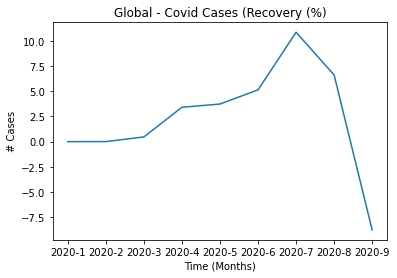

In [58]:
plt.xlabel("Time (Months)") 
plt.ylabel("# Cases") 
plt.title("Global - Covid Cases (Recovery (%)")  
plt.plot(df2['month'], df2['PercMoves'])  
plt.show() 

<AxesSubplot:xlabel='yyyymm', ylabel='CasesPerD'>

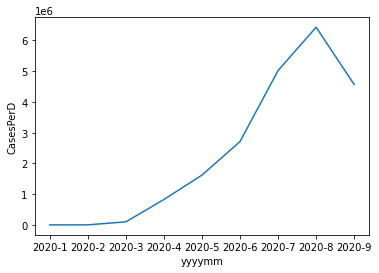

In [59]:
sns.lineplot(data=df2, x="yyyymm", y="CasesPerD")

### India

In [60]:
df2=df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='India')]

In [61]:
df2

,Country/Region,Date,Cases,CasesPerD,yyyymm
25489,India,2020-02-16,3,3,2020-2
25490,India,2020-02-17,3,0,2020-2
25491,India,2020-02-18,3,0,2020-2
25492,India,2020-02-19,3,0,2020-2
25493,India,2020-02-20,3,0,2020-2
...,...,...,...,...,...
25703,India,2020-09-17,4112551,87472,2020-9
25704,India,2020-09-18,4208431,95880,2020-9
25705,India,2020-09-19,4303043,94612,2020-9
25706,India,2020-09-20,4396399,93356,2020-9


In [62]:
df2.yyyymm.unique()

array(['2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7',
       '2020-8', '2020-9'], dtype=object)

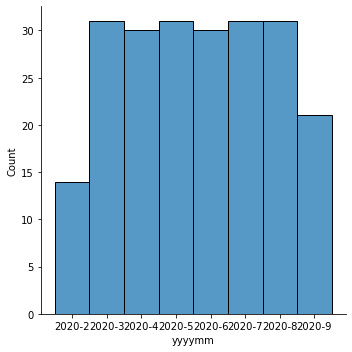

In [63]:
sns.displot(df2.yyyymm, kind='hist')

In [64]:
df3 = df2.groupby(['yyyymm']).sum()

In [65]:
df3


,Cases,CasesPerD
yyyymm,,
2020-2,42,3
2020-3,818,120
2020-4,85811,8945
2020-5,1216954,82784
2020-6,5916008,256060
2020-7,20721573,746462
2020-8,60316822,1745508
2020-9,76535867,1556517


In [66]:
df3.drop(columns='Cases', axis=0, inplace=True)

In [67]:
df3['Perc']= df3['CasesPerD']/df3['CasesPerD'].sum()*100


In [68]:
df3['month']=df3.index

In [69]:
df3

,CasesPerD,Perc,month
yyyymm,,,
2020-2,3,0.000068,2020-2
2020-3,120,0.002730,2020-3
2020-4,8945,0.203462,2020-4
2020-5,82784,1.882996,2020-5
2020-6,256060,5.824312,2020-6
2020-7,746462,16.978941,2020-7
2020-8,1745508,39.703130,2020-8
2020-9,1556517,35.404362,2020-9


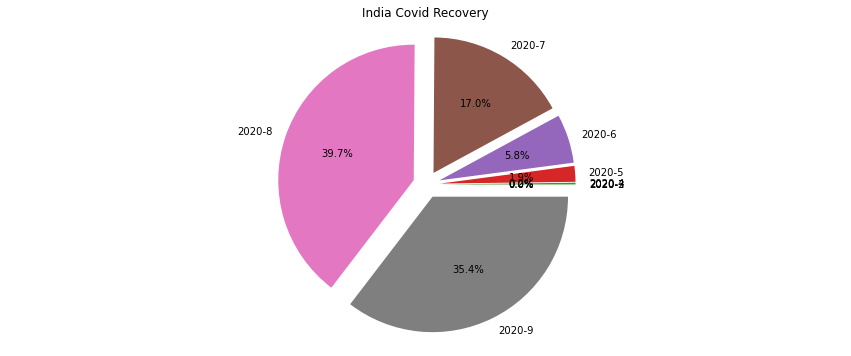

In [70]:
plt.figure(figsize=(15,6))
plt.pie(df3['CasesPerD'], labels = df3['month'], autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.title('India Covid Recovery')
plt.axis('equal')
plt.show()

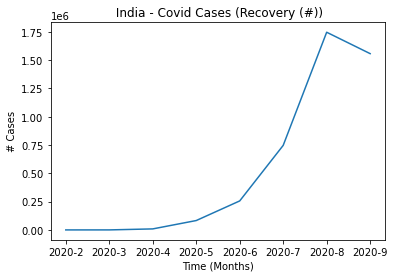

In [71]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title(" India - Covid Cases (Recovery (#))")  
plt.plot(df3['month'], df3['CasesPerD'])
plt.show() 

In [72]:
df3['PercMoves'] = df3['Perc'].diff()


In [73]:
df3['PercMoves'] = np.where(df3['PercMoves'].isnull(), df3['Perc'], df3['PercMoves'])

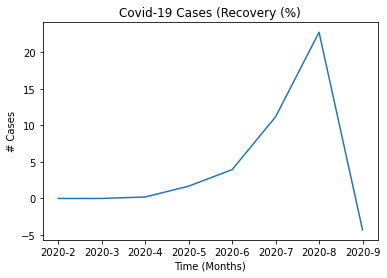

In [74]:
plt.xlabel("Time (Months)") 
plt.ylabel("# Cases") 
plt.title("Covid-19 Cases (Recovery (%)")  
plt.plot(df3['month'], df3['PercMoves'])  
plt.show() 

<AxesSubplot:xlabel='month', ylabel='CasesPerD'>

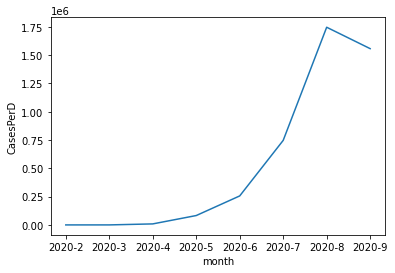

In [75]:
sns.lineplot(data=df3, x="month", y="CasesPerD")

### Brazil

In [76]:
df2=df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='Brazil')]

In [77]:
df2

,Country/Region,Date,Cases,CasesPerD,yyyymm
5648,Brazil,2020-03-16,1,1,2020-3
5649,Brazil,2020-03-17,2,1,2020-3
5650,Brazil,2020-03-18,2,0,2020-3
5651,Brazil,2020-03-19,2,0,2020-3
5652,Brazil,2020-03-20,2,0,2020-3
...,...,...,...,...,...
5833,Brazil,2020-09-17,3873934,28470,2020-9
5834,Brazil,2020-09-18,3897539,23605,2020-9
5835,Brazil,2020-09-19,3936893,39354,2020-9
5836,Brazil,2020-09-20,3963446,26553,2020-9


In [78]:
df2.yyyymm.unique()

array(['2020-3', '2020-4', '2020-5', '2020-6', '2020-7', '2020-8',
       '2020-9'], dtype=object)

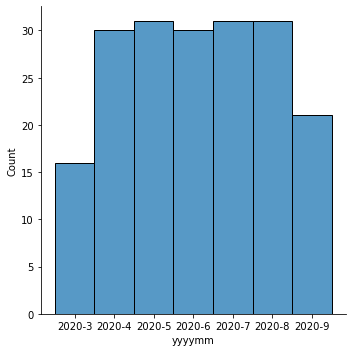

In [79]:
sns.displot(df2.yyyymm, kind='hist')

In [80]:
df3 = df2.groupby(['yyyymm']).sum()

In [81]:
df3.drop(columns='Cases', axis=0, inplace=True)

In [82]:
df3['Perc']= df3['CasesPerD']/df3['CasesPerD'].sum()

In [83]:
df3['month']=df3.index

In [84]:
df3

,CasesPerD,Perc,month
yyyymm,,,
2020-3,127,0.000032,2020-3
2020-4,35808,0.008967,2020-4
2020-5,170620,0.042725,2020-5
2020-6,581763,0.145680,2020-6
2020-7,1220536,0.305636,2020-7
2020-8,1259737,0.315452,2020-8
2020-9,724841,0.181508,2020-9


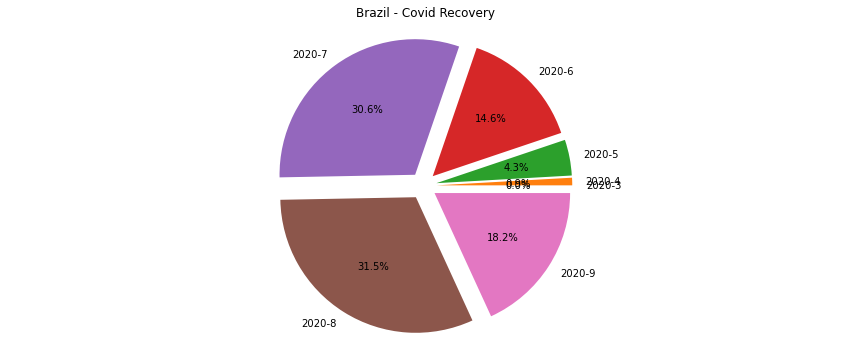

In [85]:
plt.figure(figsize=(15,6))
plt.pie(df3['CasesPerD'], labels = df3['month'], autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.title('Brazil - Covid Recovery')
plt.axis('equal')
plt.show()

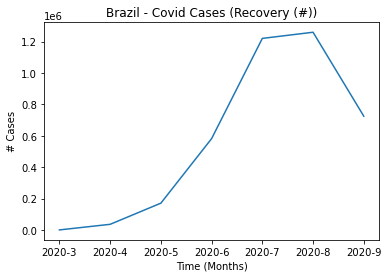

In [86]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("Brazil - Covid Cases (Recovery (#))")  
plt.plot(df3['month'], df3['CasesPerD'])
plt.show() 


In [87]:
df3['PercMoves'] = df3['Perc'].diff()

In [88]:
df3['PercMoves'] = np.where(df3['PercMoves'].isnull(), df3['Perc'], df3['PercMoves'])

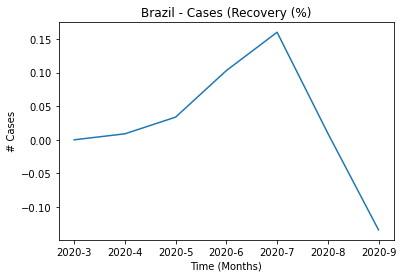

In [89]:
plt.xlabel("Time (Months)") 
plt.ylabel("# Cases") 
plt.title("Brazil - Cases (Recovery (%)")  
plt.plot(df3['month'], df3['PercMoves'])  
plt.show() 

### US

In [90]:
df2=df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='US')]

In [91]:
df2

,Country/Region,Date,Cases,CasesPerD,yyyymm
43246,US,2020-02-09,3,3,2020-2
43247,US,2020-02-10,3,0,2020-2
43248,US,2020-02-11,3,0,2020-2
43249,US,2020-02-12,3,0,2020-2
43250,US,2020-02-13,3,0,2020-2
...,...,...,...,...,...
43467,US,2020-09-17,2540334,14761,2020-9
43468,US,2020-09-18,2556465,16131,2020-9
43469,US,2020-09-19,2577446,20981,2020-9
43470,US,2020-09-20,2590671,13225,2020-9


In [92]:
df2.yyyymm.unique()

array(['2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7',
       '2020-8', '2020-9'], dtype=object)

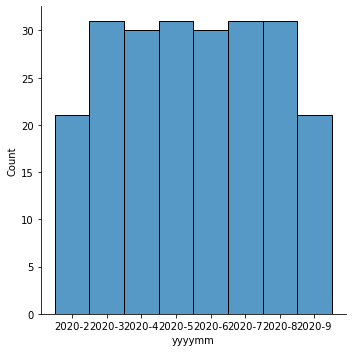

In [93]:
sns.displot(df2.yyyymm, kind='hist')

In [94]:
df3 = df2.groupby(['yyyymm']).sum()

In [95]:
df3.drop(columns='Cases', axis=0, inplace=True)

In [96]:
df3['Perc']= df3['CasesPerD']/df3['CasesPerD'].sum()

In [97]:
df3['month']=df3.index

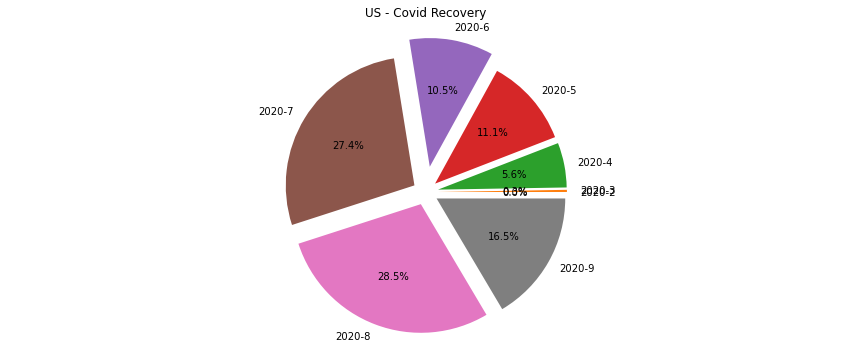

In [98]:
plt.figure(figsize=(15,6))
plt.pie(df3['CasesPerD'], labels = df3['month'], autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1])
plt.title('US - Covid Recovery')
plt.axis('equal')
plt.show()

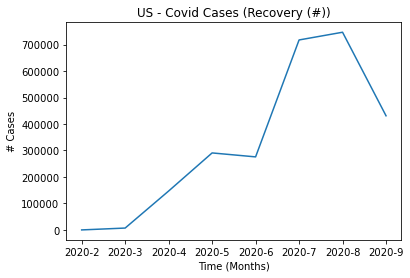

In [99]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("US - Covid Cases (Recovery (#))")  
plt.plot(df3['month'], df3['CasesPerD'])
plt.show() 

In [100]:
df3['PercMoves'] = df3['Perc'].diff()

In [101]:
df3['PercMoves'] = np.where(df3['PercMoves'].isnull(), df3['Perc'], df3['PercMoves'])

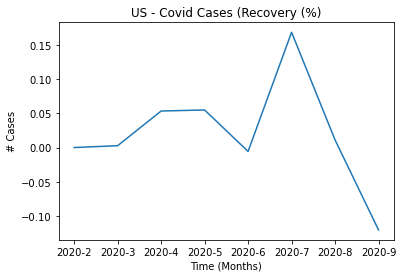

In [102]:
plt.xlabel("Time (Months)") 
plt.ylabel("# Cases") 
plt.title("US - Covid Cases (Recovery (%)")  
plt.plot(df3['month'], df3['PercMoves'])  
plt.show() 

### Russia

In [103]:
df2=df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='Russia')]

In [104]:
df2.yyyymm.unique()

array(['2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7',
       '2020-8', '2020-9'], dtype=object)

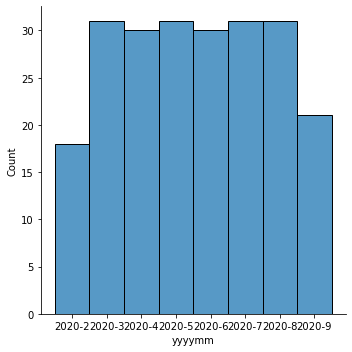

In [105]:
sns.displot(df2.yyyymm, kind='hist')

In [106]:
df3 = df2.groupby(['yyyymm']).sum()

In [107]:
df3.drop(columns='Cases', axis=0, inplace=True)

In [108]:
df3['Perc']= df3['CasesPerD']/df3['CasesPerD'].sum()

In [109]:
df3['month']=df3.index

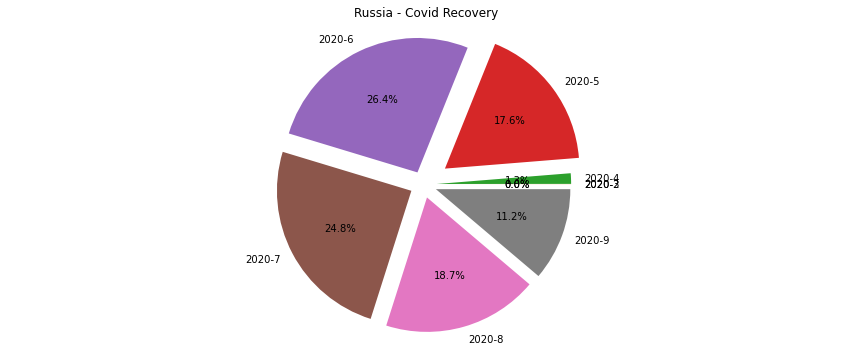

In [110]:
plt.figure(figsize=(15,6))
plt.pie(df3['CasesPerD'], labels = df3['month'], autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.2, 0.1, 0.1, 0.1, 0.1])
plt.title('Russia - Covid Recovery')
plt.axis('equal')
plt.show()

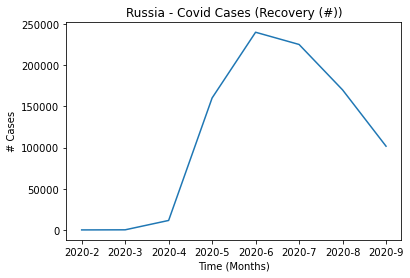

In [111]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("Russia - Covid Cases (Recovery (#))")  
plt.plot(df3['month'], df3['CasesPerD'])
plt.show() 



In [112]:
df3['PercMoves'] = df3['Perc'].diff()

In [113]:
df3['PercMoves'] = np.where(df3['PercMoves'].isnull(), df3['Perc'], df3['PercMoves'])

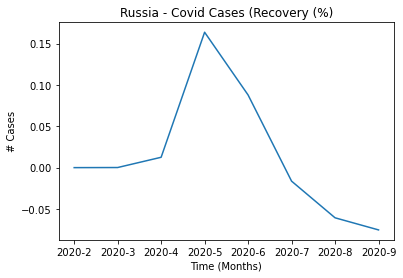

In [114]:
plt.xlabel("Time (Months)") 
plt.ylabel("# Cases") 
plt.title("Russia - Covid Cases (Recovery (%)")  
plt.plot(df3['month'], df3['PercMoves'])  
plt.show() 

### Israel

In [115]:
df2=df1.loc[(df1['Cases']>0) & (df1['Country/Region']=='Israel')]

In [116]:
df2.yyyymm.unique()


array(['2020-2', '2020-3', '2020-4', '2020-5', '2020-6', '2020-7',
       '2020-8', '2020-9'], dtype=object)

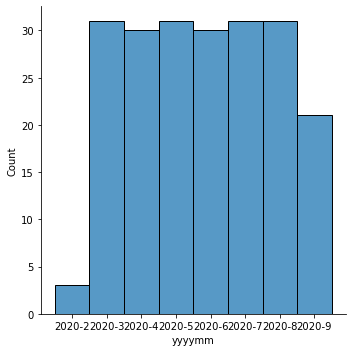

In [117]:
sns.displot(df2.yyyymm, kind='hist')

In [118]:
df3 = df2.groupby(['yyyymm']).sum()

In [119]:
df3.drop(columns='Cases', axis=0, inplace=True)

In [120]:
df3['Perc']= df3['CasesPerD']/df3['CasesPerD'].sum()

In [121]:
df3['month']=df3.index

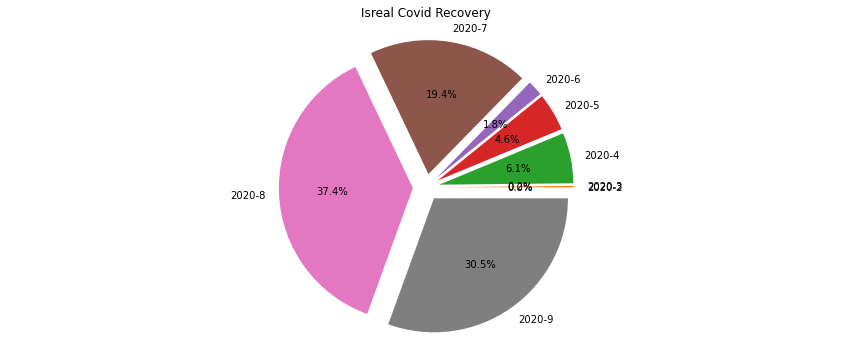

In [122]:
plt.figure(figsize=(15,6))
plt.pie(df3['CasesPerD'], labels = df3['month'], autopct='%1.1f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])
plt.title('Isreal Covid Recovery')
plt.axis('equal')
plt.show()

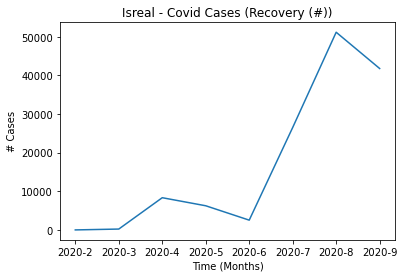

In [123]:
plt.xlabel("Time (Months)")  
plt.ylabel("# Cases")  
plt.title("Isreal - Covid Cases (Recovery (#))")  
plt.plot(df3['month'], df3['CasesPerD'])
plt.show() 

In [124]:
df3['PercMoves'] = df3['Perc'].diff()

In [125]:
df3['PercMoves'] = np.where(df3['PercMoves'].isnull(), df3['Perc'], df3['PercMoves'])

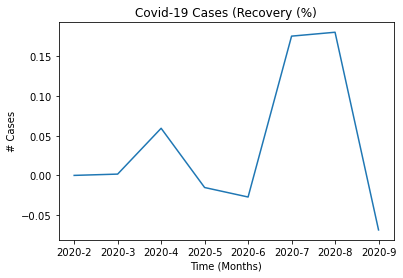

In [126]:
plt.xlabel("Time (Months)") 
plt.ylabel("# Cases") 
plt.title("Covid-19 Cases (Recovery (%)")  
plt.plot(df3['month'], df3['PercMoves'])  
plt.show() 